In [1]:
import numpy as np 
import pandas as pd
import praw #for reddit wrapper
import matplotlib.pyplot as plt #for basic visualizations
import networkx as nx #to create Network Graphs

In [86]:
#Setting up the Reddit API in python
reddit = praw.Reddit(client_id='mBPz4HF59_0MX5n7TXFGXg',
                     client_secret='L0YrbwjFpyLZs7ia5hTIUyEKuGVrvw',
                     user_agent='User')


In [50]:
def get_posts(subred_name, n):
    subreddit = reddit.subreddit(subred_name)
    posts_info = [] 
    
    for subm in subreddit.top(limit=n):
        
        subred_info = []
        subred_info.append(subm.id)  
        subred_info.append(str(subm.author)) 
        subred_info.append(subm.score)  
        subred_info.append(subm.upvote_ratio)
        subred_info.append(subm.num_comments)
        subred_info.append(subm.subreddit)
        posts_info.append(subred_info)
    
    sorted_info = sorted(posts_info, key=lambda x: x[1], reverse = True)
    posts_df = pd.DataFrame(sorted_info, columns = ['id','author', 'score','upvote_ratio' ,'num_comments', 'subreddit'])
    return posts_df

In [100]:
def get_redditor(redditor_name, n):
    redditor = reddit.redditor(redditor_name)
    posts_info = [] 
    
    for subm in redditor.top(limit=n):
        
        subred_info = []
        subred_info.append(subm.id)  
        #subred_info.append(str(subm.author)) 
        subred_info.append(subm.score)  
        #subred_info.append(subm.upvote_ratio)
        #subred_info.append(subm.num_comments)
        subred_info.append(subm.subreddit)
        posts_info.append(subred_info)
    
    #sorted_info = sorted(posts_info, key=lambda x: x[1], reverse = True)
    posts_df = pd.DataFrame(posts_info, columns = ['id','score','subreddit'])
    return posts_df

In [101]:
get_redditor('Stauce52',50)

,id,score,subreddit
0,frhpr8,58755,gifs
1,68aans,55787,funny
2,d7ls35,48116,AnimalsBeingBros
3,wpcrt7,43014,oddlysatisfying
4,i1gl5a,37933,gifs
5,bd9u99,37426,science
6,b8d239,36196,Damnthatsinteresting
7,x56jcl,36160,WTF
8,ct0v2f,32686,politics
9,w0y9p7,32617,fuckcars


In [102]:
nfl_df = get_posts('nfl', 5000)

nfl_df.shape

(987, 6)

In [103]:
nfl_df.head()

,id,author,score,upvote_ratio,num_comments,subreddit
0,opi9g6,zipzog,16054,0.95,1185,nfl
1,k8jeki,zipzog,12727,0.99,1751,nfl
2,ivfhra,zachwilson23,11274,0.98,421,nfl
3,qng5fz,youre-a-cat-gatter,11295,0.93,2259,nfl
4,ssgzjg,xXTheRacerXx,11620,0.98,901,nfl


In [104]:
nfl_df = nfl_df.drop(nfl_df[nfl_df["author"]  == "onlyusernameavailab"].index)

nfl_df = nfl_df.drop(nfl_df[nfl_df["author"]  == "Winstonp00"].index)

Taking only those users who have posted more than once

In [105]:
freq_authors = nfl_df[nfl_df.duplicated(['author'], keep = False)]

Getting rid of deleted users

In [106]:
freq_authors = freq_authors[freq_authors.author != 'None']

How many users post more than once

In [107]:
freq_authors.author.nunique()

100

Text(0, 0.5, 'Number of posts')

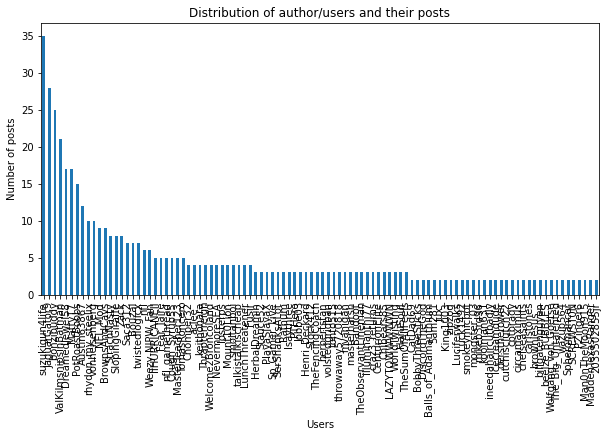

In [108]:
plt.figure(figsize=(10, 5))
ax = freq_authors['author'].value_counts().plot(kind='bar',title='Distribution of author/users and their posts')
ax.set_xlabel("Users")
ax.set_ylabel("Number of posts")

In [109]:
redditor = reddit.redditor('Stauce52')
posts_info = [] 
n=50

for subm in redditor.top(limit=n):
        
        subred_info = []
        print(subm.subreddit)

gifs
funny
AnimalsBeingBros
oddlysatisfying
gifs
science
Damnthatsinteresting
WTF
politics
fuckcars
UpliftingNews
Unexpected
science
reactiongifs
gifs
news
gifs
science
gifs
nfl
sports
HumansBeingBros
science
WTF
nfl
bestof
gifs
nfl
Music
SweatyPalms
politics
whitepeoplegifs
holdmycosmo
science
ProgrammerHumor
ProgrammerHumor
gifs
BlueMidterm2018
sports
whitepeoplegifs
gifs
science
gifs
nfl
nfl
television
nfl
nfl
Futurology
whitepeoplegifs


In [111]:
authors_lst = list(freq_authors.author.unique())
authors_lst

['zipzog',
 'wazup564',
 'vonheisenberg',
 'volstedgridban',
 'twistedlogicx',
 'tonto515',
 'throwaway5720818',
 'talkistalkischeap',
 'suzukigun4life',
 'smoltanboi',
 'smokeymicpot',
 'rhydon_my_steelix',
 'nfl_gamethread',
 'nfl',
 'mvanigan',
 'mongster_03',
 'mikeb3rd96',
 'masterharsh',
 'losterps',
 'koolman631',
 'keithohara',
 'ineedahaircutbadly',
 'illuminanthi77',
 'icecreamdude',
 'herbertstan',
 'derstherower',
 'cutchisclutch22',
 'craz3_returns',
 'cptbrady',
 'circamaximus',
 'chelseasaints',
 'carlstones',
 'brownjesus__',
 'billgatenguyen',
 'beelze_BUBBLES',
 'aclee_',
 '_bonzibuddy',
 'Zack',
 'WorldTwisting',
 'Wolfgang_von_Goetse',
 'Welcome2Broncoland',
 'Weezy-NJPW_Fan',
 'ValKilmsnipsinBatman',
 'TomasRoncero',
 'Thrapterreign',
 'The_Big_Untalented',
 'TheSumOfAllFeels',
 'TheObservantLineman',
 'TheFencingCoach',
 'StrachNasty',
 'Stock412',
 'Stauce52',
 'Spheromancer',
 'Sp_Gamer_Live',
 'SlopingGiraffe',
 'SerShanksALot',
 'Saca312',
 'SCREWST0N',
 'Rath

In [112]:

authors_df =  pd.DataFrame() 
authors_df = authors_df.fillna(0)
for u in authors_lst: 
    c = get_redditor(u, 10)
    authors_df = pd.concat([authors_df, c])

Forbidden: received 403 HTTP response

In [113]:
authors_df.head

<bound method NDFrame.head of          id  score subreddit
0    bwgfak  20676       nba
1    opi9g6  16056       nfl
2    k8jeki  12715       nfl
3    u6q5un  12283       nba
4    flgygg   8993       nfl
..      ...    ...       ...
5    cvh9li  12252       nfl
6    9w5x0s  11974       nfl
7    mmwslw  11906       nfl
8    hntvz5   9293       nfl
9   eekqvpv   8921       nfl

[800 rows x 3 columns]>

In [99]:
plt.figure(figsize=(10, 5))
ax = freq_authors['author'].value_counts().plot(kind='bar',title='Distribution of author/users and their posts')
ax.set_xlabel("Users")
ax.set_ylabel("Number of posts")

'Winstonp00'

'HerbalDreamin'